In [326]:
import os
import sys
import time
import warnings 
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
os.listdir('safety')

['.DS_Store', 'data_dictionary.xlsx', 'features', 'labels']

In [3]:
pd.read_excel('./safety/data_dictionary.xlsx')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
description,trip id,accuracy inferred by GPS in meters,GPS bearing,accelerometer reading in x axis (m/s2),accelerometer reading in y axis (m/s2),accelerometer reading in z axis (m/s2),gyroscope reading in x axis (rad/s),gyroscope reading in y axis (rad/s),gyroscope reading in z axis (rad/s),time of the record by number of seconds,speed measured by GPS in m/s
samples,1,5,303.695,-0.00636292,-0.393829,-0.922379,"-0.020000606102604086,0.03205247529964867,-0.0...",NaN,NaN,0,0.57
NaN,1,10,325.39,0.183914,-0.355026,-0.92041,"-0.028598887998033916,0.025720543491876274,-0....",NaN,NaN,1,0.28
NaN,1,5,303.695,-0.00636292,-0.392944,-0.922226,"-0.01894040167264354,0.030980020328673762,-0.0...",NaN,NaN,2,0.57
NaN,1,10,324.23,0.165924,-0.332092,-0.920578,"-0.0577245492596855,0.002558232543130116,0.014...",NaN,NaN,3,0.28
NaN,1,5,303.695,-0.00642395,-0.392166,-0.924164,"-0.017865283540578553,0.03203915949419828,-0.0...",NaN,NaN,4,0.57
NaN,1,10,324.23,0.169724,-0.333694,-0.939575,"-0.04030587783391324,0.03112276576310201,-0.00...",NaN,NaN,5,0.28
NaN,1,5,303.695,-0.00480652,-0.391861,-0.923065,"-0.020006731373111267,0.03205726898961082,-0.0...",NaN,NaN,6,0.57
NaN,2,10,322.99,0.174759,-0.344498,-0.918839,"-0.00411618178082647,0.02562493600874243,0.004...",NaN,NaN,0,0.28
NaN,2,5,303.695,-0.00646973,-0.391953,-0.923889,"-0.0189390700920985,0.032050611086885616,-0.00...",NaN,NaN,1,0.57


In [4]:
os.listdir('safety/labels')

['.DS_Store', 'part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv']

In [5]:
df_labels = pd.read_csv('./safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')
df_labels.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


Labels should be unique - one bookingID should not have multiple labels

In [6]:
sum(df_labels.bookingID.duplicated(keep=False))

36

In [7]:
df_labels[df_labels.bookingID.duplicated(keep=False)].sort_values(by='bookingID')

,bookingID,label
12602,13,1
12463,13,0
2351,154618822837,1
5295,154618822837,0
11215,223338299461,1
6212,223338299461,0
19936,395136991308,0
6121,395136991308,1
17623,403726925929,1
8472,403726925929,0


In [8]:
removed_ids = df_labels[df_labels.bookingID.duplicated(keep=False)].sort_values(by='bookingID').bookingID.unique()

Duplicates are dropped to prevent corrupting the data

In [9]:
df_labels = df_labels[~df_labels.bookingID.duplicated(keep=False)]

In [10]:
label_dict = {row[1][0]:row[1][1] for row in df_labels.iterrows()}

In [11]:
len(label_dict)

19982

In [12]:
df_labels.label.value_counts()

0    14999
1     4983
Name: label, dtype: int64

In [13]:
os.listdir('safety/features')

['.DS_Store',
 'part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv']

In [14]:
csv_paths = [os.path.join('safety/features/', i) for i in os.listdir('safety/features') if i.split('.')[-1] == 'csv']

In [15]:
df = pd.concat([pd.read_csv(path) for path in csv_paths])

In [16]:
df.sort_values(by=['bookingID', 'second'])

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1153972,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
712971,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
167611,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
436147,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
1423207,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454
357335,0,8.0,143.298294,-0.608313,-9.539658,-1.794583,-0.007538,-0.023838,0.018068,5.0,0.228454
1413389,0,8.0,143.298294,-0.867758,-9.698615,-1.615439,0.022728,-0.012178,0.005982,6.0,0.228454
767009,0,8.0,143.298294,-1.050790,-9.745270,-1.411771,0.027603,0.001841,0.000904,7.0,0.228454
1312324,0,8.0,143.298294,-0.721213,-9.960004,-1.202271,0.001864,-0.007702,0.014018,8.0,0.228454
945598,0,8.0,143.298294,-0.346924,-9.532629,-1.204663,0.014962,-0.050033,0.025118,9.0,0.228454


In [17]:
len(label_dict)

19982

In [18]:
unique_booking_ids = [i for i in df.bookingID.unique()]
len(unique_booking_ids)

20000

In [19]:
booking_id_labels = list(df_labels.bookingID)

Ensuring that all datapoints have a label - otherwise the data is useless

In [20]:
all(booking_id in booking_id_labels for booking_id in unique_booking_ids)

False

In [21]:
missing_ids = [booking_id for booking_id in unique_booking_ids if booking_id not in booking_id_labels]

Some are missing, but those are the ones dropped for having labels of both 1 and 0 - so that is fine

In [22]:
all(missing_id in removed_ids for missing_id in missing_ids)

True

Getting rid of those corrupted rows - also, it doesn't make sense for speed to be below 0, so we'll check for those.

In [23]:
df = df[df.bookingID.apply(lambda x: False if x in missing_ids else True)]

In [24]:
df[df.Speed < 0]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
78,1357209665630,1414.000,245.818924,0.045309,-9.656146,0.165237,-0.038815,0.042800,0.038172,1939.0,-1.0
136,343597383726,73.000,241.599960,0.487189,-10.072006,-1.442426,-0.077468,-0.029360,-0.010398,187.0,-1.0
158,188978561088,65.000,83.436867,-0.003738,-4.887738,-8.467484,-0.028650,0.138222,-0.110813,366.0,-1.0
227,506806141077,17.060,0.000000,-0.833182,3.093309,9.088389,0.046496,0.349136,0.266407,671.0,-1.0
274,1065151889525,48.000,143.501038,0.097348,-9.876563,-1.880417,-0.019760,0.050283,-0.016945,924.0,-1.0
304,1425929142425,5.370,0.000000,0.510827,8.743807,4.429838,-0.012636,-0.012409,0.003316,78.0,-1.0
343,721554505871,37.527,305.845520,1.292908,9.474146,2.846793,-0.041583,-0.057245,-0.014277,564.0,-1.0
432,455266533467,65.000,182.599899,0.617584,-1.786957,-9.578537,-0.028075,0.037469,-0.008795,285.0,-1.0
484,687194767363,65.000,200.503281,2.211938,9.493900,-3.641504,-0.552058,2.753265,0.582301,625.0,-1.0
489,1288490188948,1414.000,20.044176,-0.642706,-0.521732,-9.962546,0.003193,-0.005384,0.005389,1043.0,-1.0


-1 appears to be some kind of error for when speed isn't detected properly, so we'll get rid of those

In [25]:
df = df[df.Speed > 0]

In [26]:
df[df.Speed < 0]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed


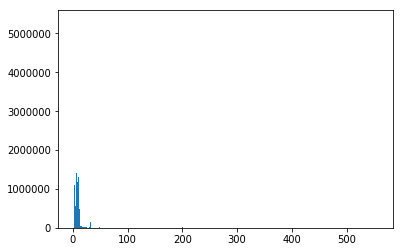

In [27]:
plt.hist(df.Accuracy, bins=int(max(df.Accuracy)))
plt.show()

Looks like anything above ~25m is very rare and may cause errors in readings based on GPS, so we'll drop those too

In [28]:
df = df[df.Accuracy < 25]

In [29]:
unique_booking_ids = [i for i in df.bookingID.unique()]
all(booking_id in booking_id_labels for booking_id in unique_booking_ids)

True

In [30]:
len(unique_booking_ids)

19936

In [31]:
sum([label_dict[unique_booking_id] for unique_booking_id in unique_booking_ids])

4964

Verifying that there are no repeat seconds within the data for each booking

In [75]:
for i, bookingID in enumerate(unique_booking_ids):
    temp_df = df[df.bookingID == bookingID]
    if max(temp_df.second.value_counts()) > 1:
        print(temp_df)
    print(i, 'complete.', end='\r')

From here we move on to extracting features from the data given to us. Intuition and reason will first be our guide - intuitively, what makes a customer potentially likely to label a trip as dangerous?

- Not slowing down (sufficiently) for road humps
- Sudden accelerations
- Driving at an excessively high speed
- Taking turns at a high speed without slowing down
- Not stopping at red lights
- Driving dangerously close to other drivers
- Overtaking dangerously
- Driving while distracted

In [35]:
all_1s = df[df.bookingID.apply(lambda x: True if label_dict[x] else False)].bookingID.unique()
all_0s = df[df.bookingID.apply(lambda x: False if label_dict[x] else True)].bookingID.unique()

In [78]:
def max_change_per_second(dataframe, column):
    dataframe = dataframe.sort_values(by='second')
    previous_second = 0
    previous_column = 0
    max_change_per_second = 0
    for second, column in zip(dataframe.second, dataframe[column]):
        column_change = column - previous_column
        second_change = second - previous_second if second > previous_second else 1
        change = column_change / second_change
        max_change_per_second = change if abs(change) > abs(max_change_per_second) else max_change_per_second 
        previous_second = second
        previous_column = column
    return max_change_per_second

In [357]:
def get_column_stats(df, column_name, ignore=None):
    start = time.time()
    column_stats = {}
    for i, bookingID in enumerate(all_1s):
        column = np.array(df[df.bookingID == bookingID][column_name])
        if ignore and 'max' in ignore:
            pass
        else:
            if f'max_{column_name}_1' in column_stats:
                column_stats[f'max_{column_name}_1'].append(max(column))
            else:
                column_stats[f'max_{column_name}_1'] = [max(column)]
        if ignore and 'mean' in ignore:
            pass
        else:
            if f'mean_{column_name}_1' in column_stats:
                column_stats[f'mean_{column_name}_1'].append(np.mean(column))
            else:
                column_stats[f'mean_{column_name}_1'] = [np.mean(column)]
        if ignore and 'mean-max' in ignore:
            pass
        else:
            if f'mean_max_diff_{column_name}_1' in column_stats:
                column_stats[f'mean_max_diff_{column_name}_1'].append(np.array(max(column)) - np.array(np.mean(column)))
            else:
                column_stats[f'mean_max_diff_{column_name}_1'] = [np.array(max(column)) - np.array(np.mean(column))]
        if ignore and 'mean-max-proportion' in ignore:
            pass
        else:
            if f'mean_max_diff_proportion_{column_name}_1' in column_stats:
                column_stats[f'mean_max_diff_proportion_{column_name}_1'].append(np.array(max(column)) / np.array(np.mean(column)))
            else:
                column_stats[f'mean_max_diff_proportion_{column_name}_1'] = [np.array(max(column)) / np.array(np.mean(column))]
        if ignore and 'var' in ignore:
            pass
        else:
            if f'var_{column_name}_1' in column_stats:
                column_stats[f'var_{column_name}_1'].append(np.var(column))
            else:
                column_stats[f'var_{column_name}_1'] = [np.var(column)]
        if ignore and 'max_change' in ignore:
            pass
        else:
            if f'max_{column_name}_change_1' in column_stats:
                column_stats[f'max_{column_name}_change_1'].append(max_change_per_second(df, column_name))
            else:
                column_stats[f'max_{column_name}_change_1'] = [max_change_per_second(df, column_name)]
        print(i, 'done', end='\r')
#     print('Calculating max values...', end='\r')
#     column_stats[f'max_{column_name}_1'] = [max(df[df.bookingID == bookingID][column_name]) for bookingID in all_1s]
#     column_stats[f'max_{column_name}_0'] = [max(df[df.bookingID == bookingID][column_name]) for bookingID in all_0s]
#     print('Calculating max values...\tdone.')
#     print('Calculating mean values...', end='\r')
#     column_stats[f'mean_{column_name}_1'] = [np.mean(df[df.bookingID == bookingID][column_name]) for bookingID in all_1s]
#     column_stats[f'mean_{column_name}_0'] = [np.mean(df[df.bookingID == bookingID][column_name]) for bookingID in all_0s]
#     print('Calculating mean values...\tdone.')
#     print('Calculating mean-max differences...', end='\r')
#     column_stats[f'mean_max_diff_{column_name}_1'] = np.array(column_stats[f'max_{column_name}_1']) - np.array(column_stats[f'mean_{column_name}_1'])
#     column_stats[f'mean_max_diff_{column_name}_0'] = np.array(column_stats[f'max_{column_name}_0']) - np.array(column_stats[f'mean_{column_name}_0'])
#     column_stats[f'mean_max_diff_proportion_{column_name}_1'] = np.array(column_stats[f'max_{column_name}_1']) / np.array(column_stats[f'mean_{column_name}_1'])
#     column_stats[f'mean_max_diff_proportion_{column_name}_0'] = np.array(column_stats[f'max_{column_name}_0']) / np.array(column_stats[f'mean_{column_name}_0'])
#     print('Calculating mean-max differences...\tdone.')
#     print('Calculating variance...', end='\r')
#     column_stats[f'var_{column_name}_1'] = [np.var(df[df.bookingID == bookingID][column_name]) for bookingID in all_1s]
#     column_stats[f'var_{column_name}_0'] = [np.var(df[df.bookingID == bookingID][column_name]) for bookingID in all_0s]
#     print('Calculating variance...\tdone.')
    
#     print('Calculating max change per second...', end='\r')
#     column_stats[f'max_{column_name}_change_1'] = [max_change_per_second(df[df.bookingID == bookingID], column_name) for bookingID in all_1s]
#     column_stats[f'max_{column_name}_change_0'] = [max_change_per_second(df[df.bookingID == bookingID], column_name) for bookingID in all_0s]
#     print('Calculating max change per second...\tdone.')
    print(f'Time taken: {time.time()-start} seconds')
    return column_stats

In [358]:
get_column_stats(df, 'Speed')

KeyboardInterrupt: 

In [318]:
# top_50_1s_max_speed = [max(df_top_50_1s[df_top_50_1s.bookingID == bookingID].Speed) for bookingID in df_top_50_1s.bookingID.unique()]
# top_50_0s_max_speed = [max(df_top_50_0s[df_top_50_0s.bookingID == bookingID].Speed) for bookingID in df_top_50_0s.bookingID.unique()]
# top_50_1s_mean_speed = [np.mean(df_top_50_1s[df_top_50_1s.bookingID == bookingID].Speed) for bookingID in df_top_50_1s.bookingID.unique()]
# top_50_0s_mean_speed = [np.mean(df_top_50_0s[df_top_50_0s.bookingID == bookingID].Speed) for bookingID in df_top_50_0s.bookingID.unique()]
# top_50_1s_mean_max_diff_speed = np.array(top_50_1s_max_speed) - np.array(top_50_1s_mean_speed)
# top_50_0s_mean_max_diff_speed = np.array(top_50_0s_max_speed) - np.array(top_50_0s_mean_speed)
# #top_50_1s_mean_speed = [np.mean(df_top_50_1s[df_top_50_1s.bookingID == bookingID].Speed) for bookingID in df_top_50_1s.bookingID.unique()]
# #top_50_1s_mean_speed = [np.mean(df_top_50_1s[df_top_50_1s.bookingID == bookingID].Speed) for bookingID in df_top_50_1s.bookingID.unique()]


In [57]:
def mps_to_kmh(speed):
    return speed * 60 * 60 / 1000

In [173]:
def plot_graphs(distribution1, distribution2):
    min_limit = min(min(distribution1), min(distribution2))
    max_limit = max(max(distribution1), max(distribution2))
    plt.hist(distribution1, bins=50, range=(min_limit,max_limit))
    plt.show()
    plt.hist(distribution2, bins=50, range=(min_limit,max_limit))
    plt.show()
    print(scipy.stats.ks_2samp(distribution1, distribution2))
    return 

In [165]:
bearing_stats = get_column_stats(df, 'Bearing')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.


C:\Users\Zenoth\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Zenoth\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1887.5328392982483 seconds


In [166]:
acceleration_x_stats = get_column_stats(df, 'acceleration_x')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.
Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1791.2900726795197 seconds


In [167]:
acceleration_y_stats = get_column_stats(df, 'acceleration_y')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.
Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1790.5024161338806 seconds


In [168]:
acceleration_z_stats = get_column_stats(df, 'acceleration_z')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.
Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1916.156944990158 seconds


In [169]:
gyro_x_stats = get_column_stats(df, 'gyro_x')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.
Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1803.5666954517365 seconds


In [170]:
gyro_y_stats = get_column_stats(df, 'gyro_y')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.


C:\Users\Zenoth\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1905.6895017623901 seconds


In [171]:
gyro_z_stats = get_column_stats(df, 'gyro_z')

Calculating max values...	done.
Calculating mean values...	done.
Calculating mean-max differences...	done.
Calculating variance...	done.
Calculating max change per second...	done.
Time taken: 1829.5036301612854 seconds


In [176]:
all_stats = {'acceleration_x': acceleration_x_stats,
             'acceleration_y': acceleration_y_stats,
             'acceleration_z': acceleration_z_stats,
             'gyro_x': gyro_x_stats,
             'gyro_y': gyro_y_stats,
             'gyro_z': gyro_z_stats,
             'Bearing': bearing_stats,
             'Speed': speed_stats}

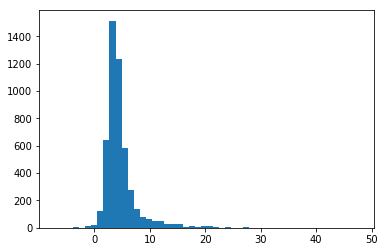

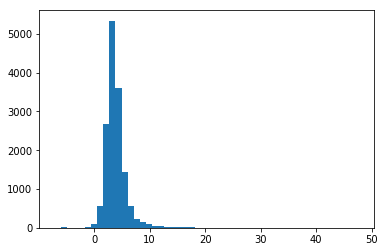

Ks_2sampResult(statistic=0.12257024285784712, pvalue=2.880930331193171e-49)


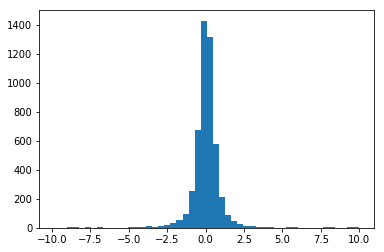

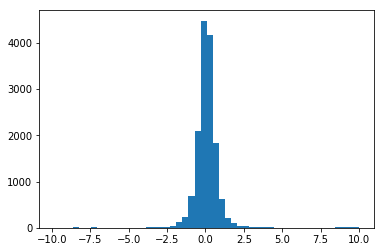

Ks_2sampResult(statistic=0.022999580414732802, pvalue=0.03813319411833334)


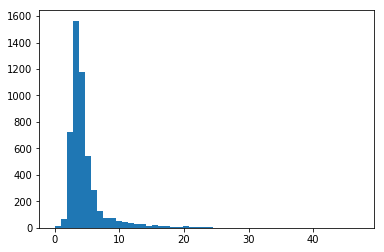

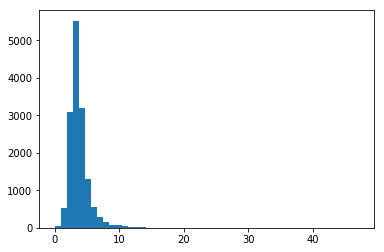

Ks_2sampResult(statistic=0.13761045867408045, pvalue=5.466993583445556e-62)


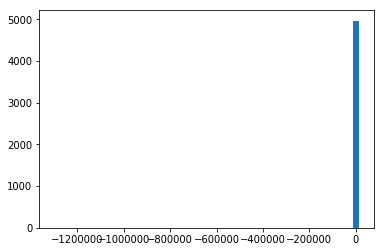

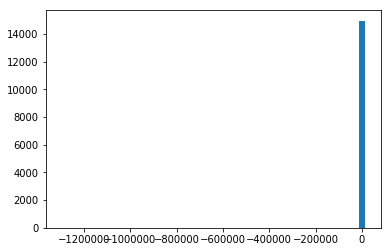

Ks_2sampResult(statistic=0.023872711737171315, pvalue=0.028070817990373306)


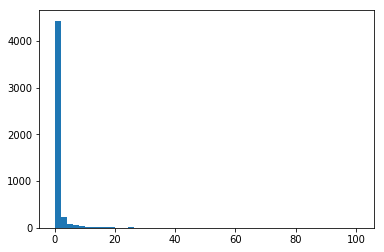

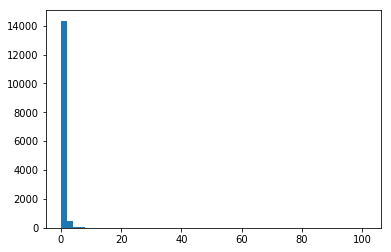

Ks_2sampResult(statistic=0.08095186222447359, pvalue=9.919054906812058e-22)


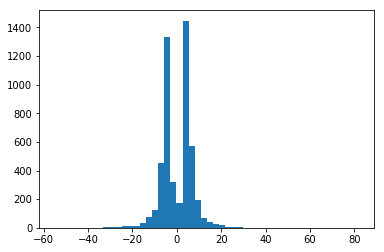

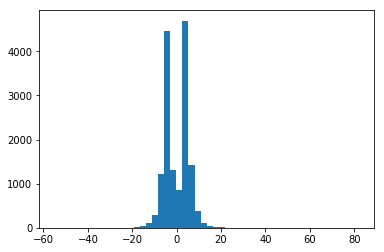

Ks_2sampResult(statistic=0.06577951687630501, pvalue=1.714235875467453e-14)


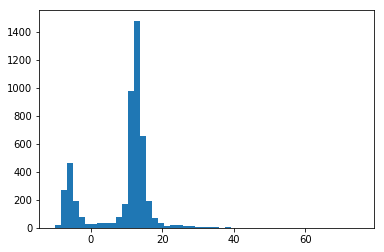

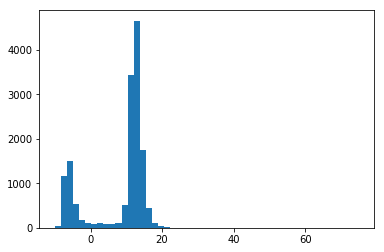

Ks_2sampResult(statistic=0.06423115251612299, pvalue=7.735927456380357e-14)


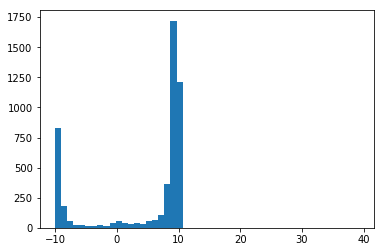

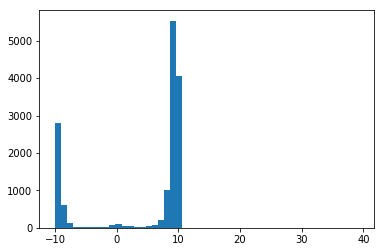

Ks_2sampResult(statistic=0.05501044872803662, pvalue=2.903854769126302e-10)


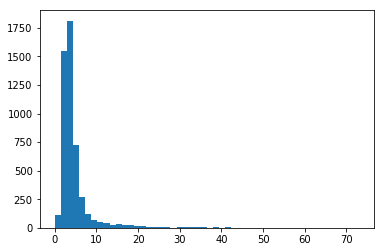

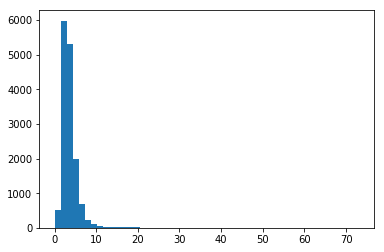

Ks_2sampResult(statistic=0.11005243631787126, pvalue=8.438101375347364e-40)


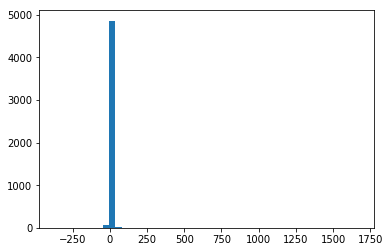

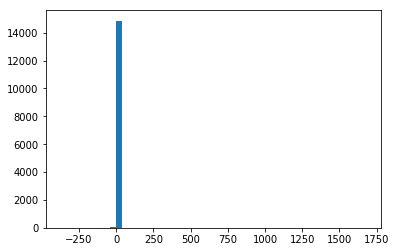

Ks_2sampResult(statistic=0.08238752628328183, pvalue=1.7143751266891276e-22)


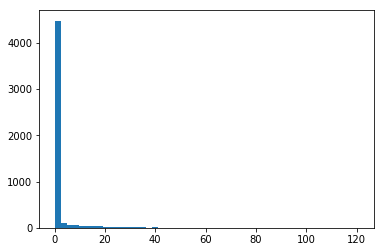

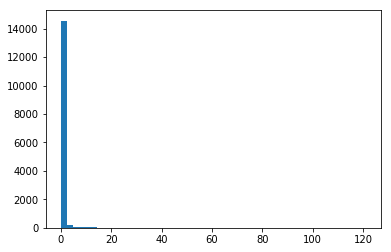

Ks_2sampResult(statistic=0.0753745966416387, pvalue=6.775567711561147e-19)


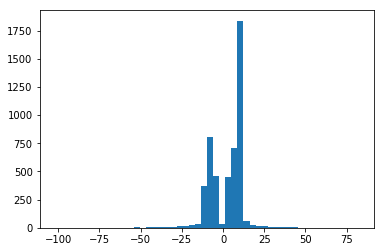

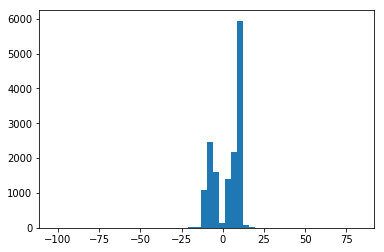

Ks_2sampResult(statistic=0.029079906989420812, pvalue=0.003563190706160792)


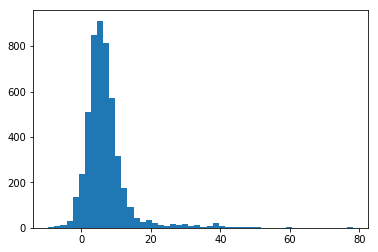

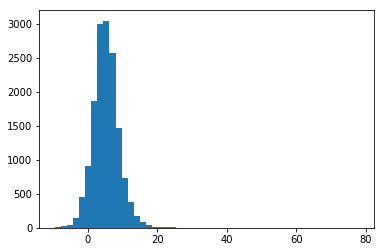

Ks_2sampResult(statistic=0.10267309614530529, pvalue=1.070539337830699e-34)


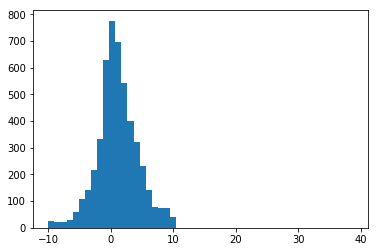

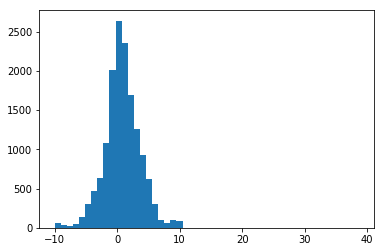

Ks_2sampResult(statistic=0.04845741597046149, pvalue=4.6478766290072905e-08)


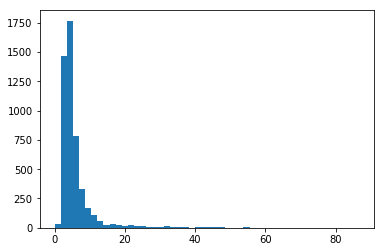

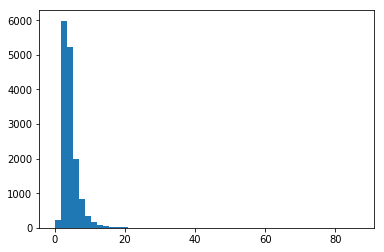

Ks_2sampResult(statistic=0.12822382602776328, pvalue=7.078935853644444e-54)


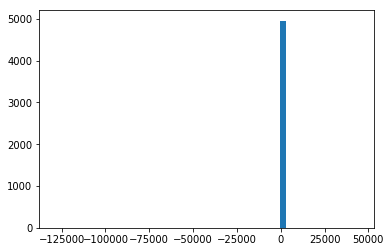

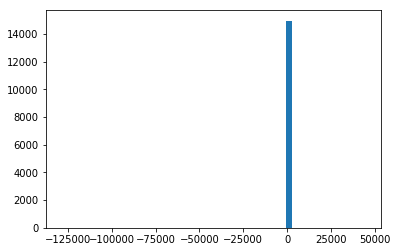

Ks_2sampResult(statistic=0.028084979687035383, pvalue=0.005454314713757909)


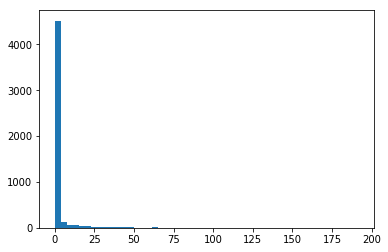

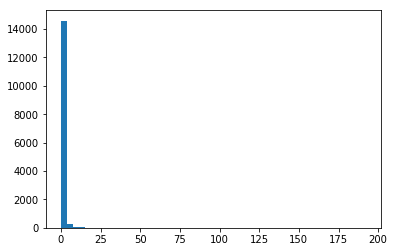

Ks_2sampResult(statistic=0.08170653444312814, pvalue=3.9572731322101775e-22)


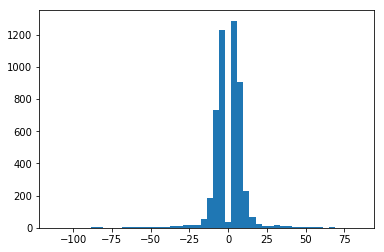

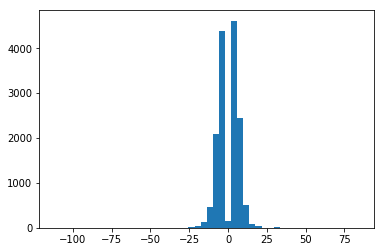

Ks_2sampResult(statistic=0.06097500722810434, pvalue=1.6365022175102245e-12)


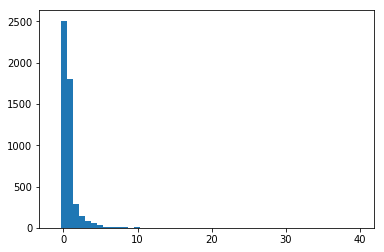

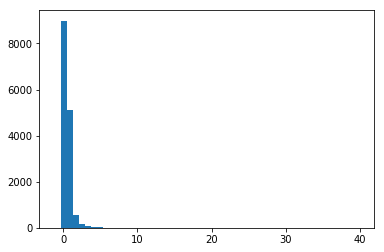

Ks_2sampResult(statistic=0.10105438828278535, pvalue=1.2638827135238103e-33)


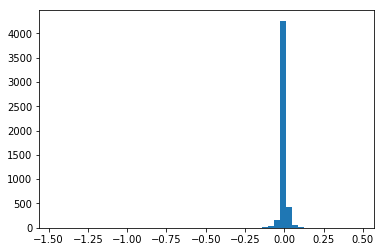

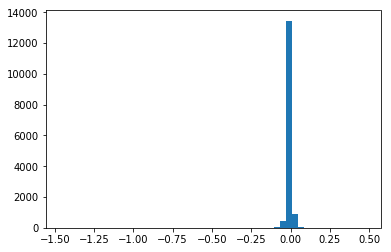

Ks_2sampResult(statistic=0.033866009998142044, pvalue=0.00037361144043033823)


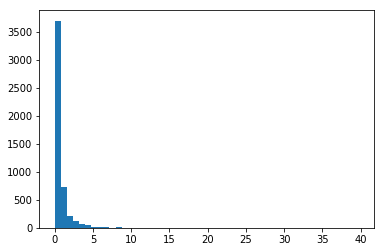

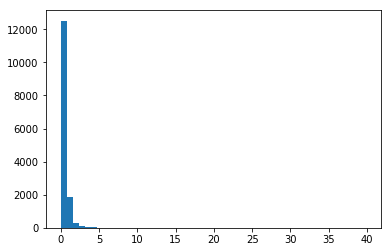

Ks_2sampResult(statistic=0.09929628510958843, pvalue=1.7653661282387307e-32)


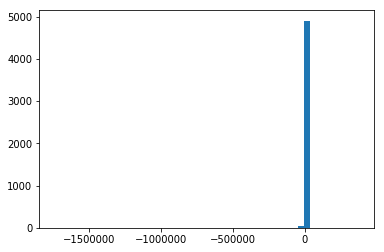

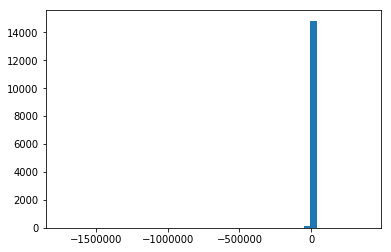

Ks_2sampResult(statistic=0.0401513929951004, pvalue=1.14804309330141e-05)


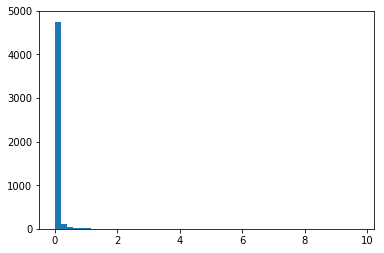

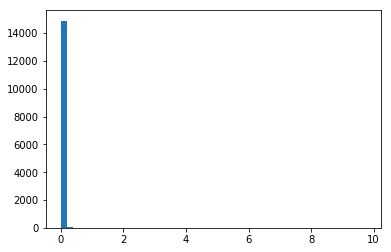

Ks_2sampResult(statistic=0.07307764178871201, pvalue=8.699671102730328e-18)


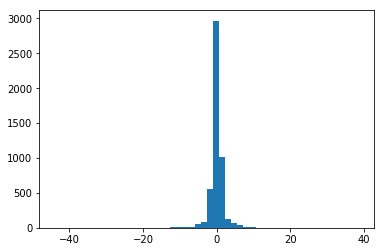

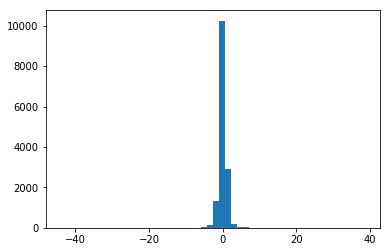

Ks_2sampResult(statistic=0.04920627556612256, pvalue=2.6883582119975107e-08)


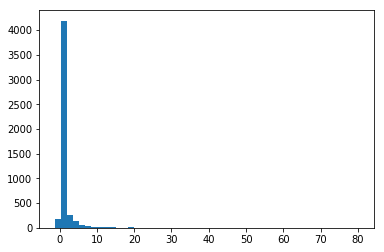

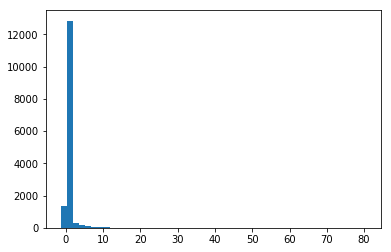

Ks_2sampResult(statistic=0.12666324439517834, pvalue=1.3903709534802248e-52)


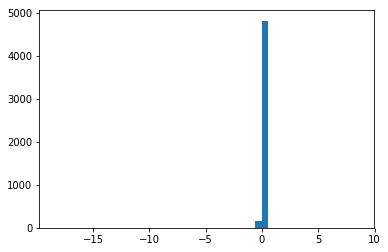

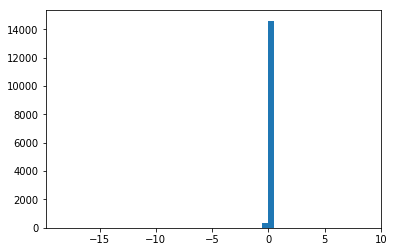

Ks_2sampResult(statistic=0.012781473577430494, pvalue=0.5737567264085367)


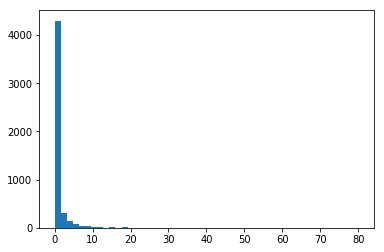

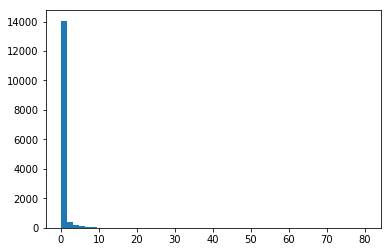

Ks_2sampResult(statistic=0.12584447186184555, pvalue=6.535308989354815e-52)


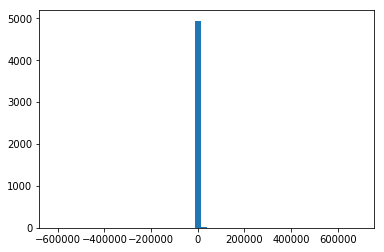

C:\Users\Zenoth\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Zenoth\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


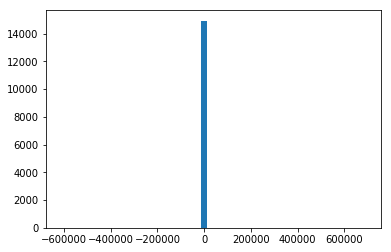

Ks_2sampResult(statistic=0.04237789670452263, pvalue=2.901205987979337e-06)


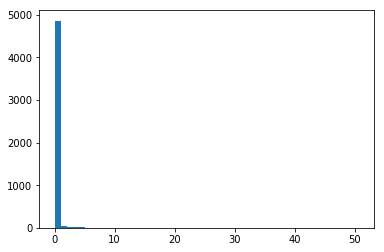

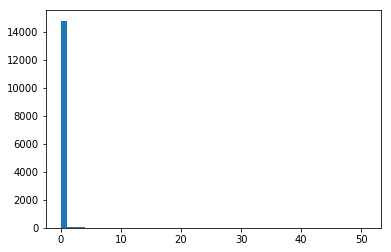

Ks_2sampResult(statistic=0.07910608532112484, pvalue=9.05568995668336e-21)


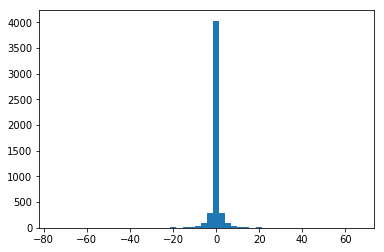

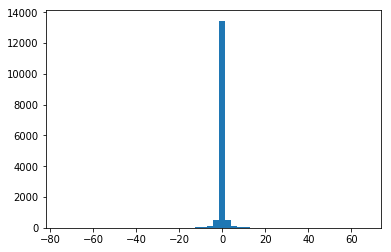

Ks_2sampResult(statistic=0.05772747323340932, pvalue=2.9319137867419474e-11)


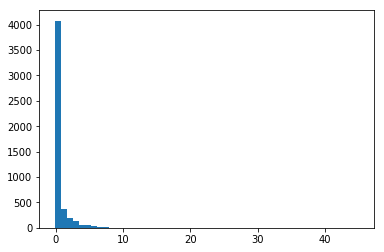

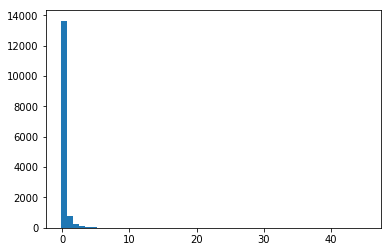

Ks_2sampResult(statistic=0.1023462437430881, pvalue=1.7678953552698416e-34)


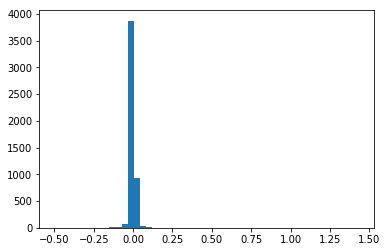

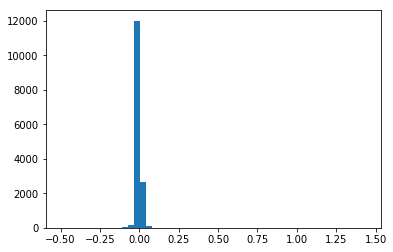

Ks_2sampResult(statistic=0.019308887737367615, pvalue=0.12269977198501218)


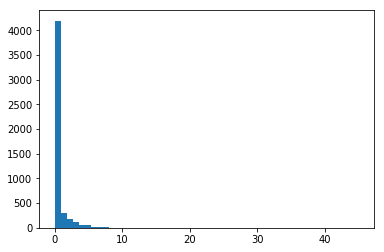

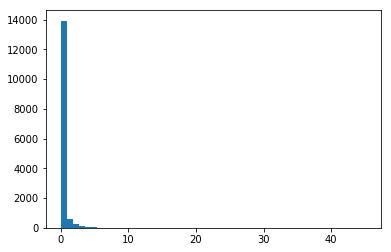

Ks_2sampResult(statistic=0.10124862676781776, pvalue=9.417986572715572e-34)


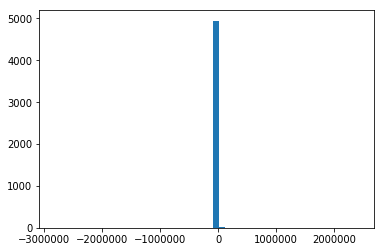

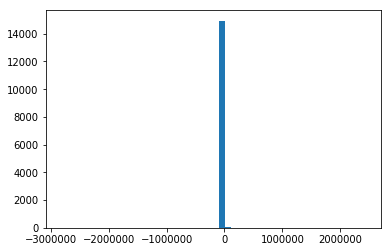

Ks_2sampResult(statistic=0.03744475586229945, pvalue=5.5303321999830597e-05)


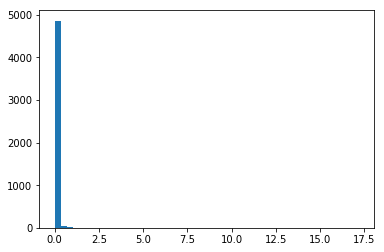

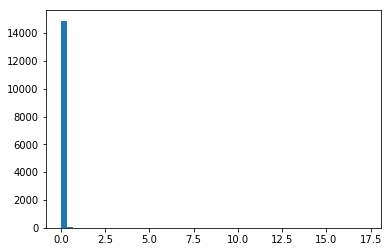

Ks_2sampResult(statistic=0.07828047757371648, pvalue=2.3952835229979705e-20)


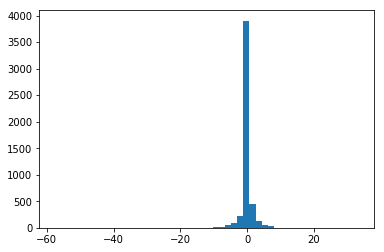

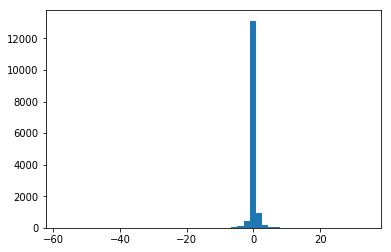

Ks_2sampResult(statistic=0.06016613768209389, pvalue=3.4078069008617857e-12)


In [181]:
for stat in ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']:
    plot_graphs(all_stats[stat]['max_'+stat+'_1'], all_stats[stat]['max_'+stat+'_0'])
    plot_graphs(all_stats[stat]['mean_'+stat+'_1'], all_stats[stat]['mean_'+stat+'_0'])
    plot_graphs(all_stats[stat]['mean_max_diff_'+stat+'_1'], all_stats[stat]['mean_max_diff_'+stat+'_0'])
    plot_graphs(all_stats[stat]['mean_max_diff_proportion_'+stat+'_1'], all_stats[stat]['mean_max_diff_proportion_'+stat+'_0'])
    plot_graphs(all_stats[stat]['var_'+stat+'_1'], all_stats[stat]['var_'+stat+'_0'])
    plot_graphs(all_stats[stat]['max_'+stat+'_change_1'], all_stats[stat]['max_'+stat+'_change_0'])


In [183]:
all_stats['Bearing']

{'max_Bearing_0': [311.0,
  358.0,
  353.231201171875,
  357.0,
  353.0,
  358.0,
  317.66845703125,
  355.0,
  350.6653747558594,
  358.43511962890625,
  357.16125,
  359.0024719238281,
  359.6084899902344,
  245.878662109375,
  353.2713623046875,
  359.91028,
  346.0,
  358.0,
  349.0,
  357.0,
  359.0,
  359.0,
  354.4101867675781,
  358.81088,
  355.1076354980469,
  358.0,
  353.0,
  346.0,
  359.0,
  358.0,
  359.5127868652344,
  201.0,
  353.0,
  308.0,
  273.0,
  348.0,
  359.0,
  359.0,
  355.0,
  359.0,
  359.0,
  358.3345642089844,
  357.0,
  359.0,
  359.0,
  359.0,
  359.0,
  357.0,
  353.0521240234375,
  359.0,
  229.0,
  359.0,
  0.0,
  359.9104309082031,
  359.2550354003906,
  353.0,
  347.0,
  359.9898376464844,
  359.0,
  359.0,
  352.0,
  359.8138122558594,
  359.0,
  359.0,
  359.0,
  357.0,
  307.5024108886719,
  345.42730712890625,
  359.0,
  359.5569152832031,
  359.4618225097656,
  359.62469482421875,
  359.3214416503906,
  359.0,
  359.3834533691406,
  359.37777

In [190]:
df_features_1s = pd.DataFrame()
df_features_0s = pd.DataFrame()

In [192]:
for stat in all_stats:
    for feature in all_stats[stat]:
        if '1' in feature:
            df_features_1s[feature] = all_stats[stat][feature]
        else:
            df_features_0s[feature] = all_stats[stat][feature]

In [197]:
df_features_1s['label'] = 1
df_features_0s['label'] = 0

In [203]:
new_columns = [i.replace('_1', '') for i in df_features_1s.columns]

In [205]:
df_features_1s.columns = new_columns
df_features_0s.columns = new_columns

In [297]:
df_combined_features = pd.concat((df_features_0s, df_features_1s))
df_combined_features.reset_index(drop=True, inplace=True)

In [298]:
df_combined_features.to_csv('combined_features.csv', index=False)

In [290]:
np.isfinite(df_combined_features).all()

max_acceleration_x                          True
mean_acceleration_x                         True
mean_max_diff_acceleration_x                True
mean_max_diff_proportion_acceleration_x     True
var_acceleration_x                          True
max_acceleration_x_change                   True
max_acceleration_y                          True
mean_acceleration_y                         True
mean_max_diff_acceleration_y                True
mean_max_diff_proportion_acceleration_y     True
var_acceleration_y                          True
max_acceleration_y_change                   True
max_acceleration_z                          True
mean_acceleration_z                         True
mean_max_diff_acceleration_z                True
mean_max_diff_proportion_acceleration_z     True
var_acceleration_z                          True
max_acceleration_z_change                   True
max_gyro_x                                  True
mean_gyro_x                                 True
mean_max_diff_gyro_x

In [299]:
df_combined_features = df_combined_features.drop(columns=['mean_max_diff_proportion_gyro_y', 'mean_max_diff_proportion_Bearing'])

In [324]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [292]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_features.drop(columns=['label']).astype('float32'), df_combined_features.label, test_size = 0.4, random_state = 100)

In [359]:
def run_model(model, alg_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy =  accuracy_score(y_test, y_pred) * 100
    print('Alg_name:', alg_name)
    print('Accuracy:', accuracy)
    print('ROC AUC score:', roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# ---- Decision Tree -----------
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(tree_model, "Decision Tree")

# ----- Random Forest ---------------
rfc_model = RandomForestClassifier(n_estimators=10)
run_model(rfc_model, "Random Forest")

# ----- xgboost ------------
xgb_model = XGBClassifier()
run_model(xgb_model, "XGBoost")

# -------- Nearest Neighbors ----------
knn_model = neighbors.KNeighborsClassifier()
run_model(knn_model, "Nearest Neighbors Classifier")

# ---------- SGD Classifier -----------------
sgd_model = OneVsRestClassifier(SGDClassifier())
run_model(sgd_model, "SGD Classifier")

# --------- Gaussian Naive Bayes ---------
gnb_model = GaussianNB()
run_model(gnb_model, "Gaussian Naive Bayes")

# ----------- Neural network - Multi-layer Perceptron  ------------
mlp_model = MLPClassifier()
run_model(mlp_model, " MLP Neural network ")

eclf = VotingClassifier(estimators=[('tree', tree_model), ('rfc', rfc_model), ('xgb', xgb_model),
                                    ('knn', knn_model), ('sgd', sgd_model), ('gnb', gnb_model),
                                    ('mlp', mlp_model)], voting='hard')
run_model(eclf, 'ECLF')

Alg_name: Decision Tree
Accuracy: 75.81191222570533
ROC AUC score: 0.541147313861709
             precision    recall  f1-score   support

          0       0.77      0.98      0.86      5979
          1       0.59      0.11      0.18      1996

avg / total       0.72      0.76      0.69      7975

Alg_name: Random Forest
Accuracy: 74.65830721003135
ROC AUC score: 0.5399618437410026
             precision    recall  f1-score   support

          0       0.77      0.95      0.85      5979
          1       0.48      0.13      0.20      1996

avg / total       0.69      0.75      0.69      7975

Alg_name: XGBoost
Accuracy: 76.37617554858934
ROC AUC score: 0.5372342359916353
             precision    recall  f1-score   support

          0       0.76      0.99      0.86      5979
          1       0.75      0.08      0.15      1996

avg / total       0.76      0.76      0.68      7975

Alg_name: Nearest Neighbors Classifier
Accuracy: 69.91849529780563
ROC AUC score: 0.5020099573624587
   

In [360]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [371]:
X_train.shape

(11961, 43)

In [389]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=43))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
11961/11961 [==============================] - 1s 64us/step - loss: 4.3511 - acc: 0.7277
Epoch 2/3
11961/11961 [==============================] - 1s 45us/step - loss: 4.0678 - acc: 0.7470
Epoch 3/3
11961/11961 [==============================] - 1s 46us/step - loss: 4.0289 - acc: 0.7499


In [390]:
y_pred = [int(np.round(i[0])) for i in model.predict(X_test)]
accuracy =  accuracy_score(y_test, y_pred) * 100
print('Alg_name:', 'LSTM')
print('Accuracy:', accuracy)
print('ROC AUC score:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Alg_name: LSTM
Accuracy: 74.80877742946709
ROC AUC score: 0.49958036159289637
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      5979
          1       0.19      0.00      0.00      1996

avg / total       0.61      0.75      0.64      7975



In [344]:
df_combined_features = pd.read_csv('combined_features.csv')

In [345]:
df_combined_features.columns

Index(['max_acceleration_x', 'mean_acceleration_x',
       'mean_max_diff_acceleration_x',
       'mean_max_diff_proportion_acceleration_x', 'var_acceleration_x',
       'max_acceleration_x_change', 'max_acceleration_y',
       'mean_acceleration_y', 'mean_max_diff_acceleration_y',
       'mean_max_diff_proportion_acceleration_y', 'var_acceleration_y',
       'max_acceleration_y_change', 'max_acceleration_z',
       'mean_acceleration_z', 'mean_max_diff_acceleration_z',
       'mean_max_diff_proportion_acceleration_z', 'var_acceleration_z',
       'max_acceleration_z_change', 'max_gyro_x', 'mean_gyro_x',
       'mean_max_diff_gyro_x', 'mean_max_diff_proportion_gyro_x', 'var_gyro_x',
       'max_gyro_x_change', 'max_gyro_y', 'mean_gyro_y',
       'mean_max_diff_gyro_y', 'mean_max_diff_proportion_gyro_y', 'var_gyro_y',
       'max_gyro_y_change', 'max_gyro_z', 'mean_gyro_z',
       'mean_max_diff_gyro_z', 'mean_max_diff_proportion_gyro_z', 'var_gyro_z',
       'max_gyro_z_change', 'max_B

In [346]:
df_combined_features = df_combined_features.drop(columns=['mean_max_diff_proportion_gyro_y', 
                                                          'mean_max_diff_proportion_Bearing',
                                                          'mean_Bearing',
                                                          'max_Bearing',
                                                          'mean_max_diff_Bearing'])

In [347]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_features.drop(columns=['label']).astype('float32'), df_combined_features.label, test_size = 0.4, random_state = 100)

In [348]:
# ---- Decision Tree -----------
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(tree_model, "Decision Tree")

# ----- Random Forest ---------------
rfc_model = RandomForestClassifier(n_estimators=10)
run_model(rfc_model, "Random Forest")

# ----- xgboost ------------
xgb_model = XGBClassifier()
run_model(xgb_model, "XGBoost")

# -------- Nearest Neighbors ----------
knn_model = neighbors.KNeighborsClassifier()
run_model(knn_model, "Nearest Neighbors Classifier")

# ---------- SGD Classifier -----------------
sgd_model = OneVsRestClassifier(SGDClassifier())
run_model(sgd_model, "SGD Classifier")

# --------- Gaussian Naive Bayes ---------
gnb_model = GaussianNB()
run_model(gnb_model, "Gaussian Naive Bayes")

# ----------- Neural network - Multi-layer Perceptron  ------------
mlp_model = MLPClassifier()
run_model(mlp_model, " MLP Neural network ")

eclf = VotingClassifier(estimators=[('tree', tree_model), ('rfc', rfc_model), ('xgb', xgb_model),
                                    ('knn', knn_model), ('sgd', sgd_model), ('gnb', gnb_model),
                                    ('mlp', mlp_model)], voting='hard')
run_model(eclf, 'ECLF')

Alg_name: Decision Tree
Accuracy: 75.81191222570533
ROC AUC score: 0.541147313861709
             precision    recall  f1-score   support

          0       0.77      0.98      0.86      5979
          1       0.59      0.11      0.18      1996

avg / total       0.72      0.76      0.69      7975

Alg_name: Random Forest
Accuracy: 75.00940438871473
ROC AUC score: 0.5456408719764332
             precision    recall  f1-score   support

          0       0.77      0.96      0.85      5979
          1       0.50      0.14      0.21      1996

avg / total       0.70      0.75      0.69      7975

Alg_name: XGBoost
Accuracy: 76.37617554858934
ROC AUC score: 0.5372342359916353
             precision    recall  f1-score   support

          0       0.76      0.99      0.86      5979
          1       0.75      0.08      0.15      1996

avg / total       0.76      0.76      0.68      7975

Alg_name: Nearest Neighbors Classifier
Accuracy: 69.91849529780563
ROC AUC score: 0.5020099573624587
   